In [17]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,13 mins 29 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_spuebla_zq4cdz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.652 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [5]:
import pandas as pd

In [6]:
train=pd.read_csv("input/train_diam.csv")
test=pd.read_csv("input/test_diam.csv")

In [7]:
h2train=h2o.H2OFrame(train)
h2test=h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
x=['carat',
 'x',
 'y',
 'z',
 'cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [19]:
y="price"

In [ ]:
aml=H2OAutoML(max_models=20,seed=1)

In [23]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200720_192533,292195,540.551,292195,272.798,0.0960055
StackedEnsemble_AllModels_AutoML_20200720_192533,294238,542.437,294238,275.997,0.0991467
GBM_3_AutoML_20200720_192533,304309,551.642,304309,284.479,0.104632
GBM_4_AutoML_20200720_192533,305054,552.317,305054,280.303,nan
GBM_1_AutoML_20200720_192533,307204,554.26,307204,289.397,0.10727
GBM_2_AutoML_20200720_192533,308829,555.724,308829,288.173,0.107321
XRT_1_AutoML_20200720_192533,313658,560.052,313658,279.004,0.0952806
DRF_1_AutoML_20200720_192533,315702,561.873,315702,280.147,0.0954941
GBM_5_AutoML_20200720_192533,319898,565.595,319898,284.724,nan
XGBoost_grid__1_AutoML_20200720_192533_model_4,322590,567.97,322590,298.245,0.107733


In [29]:
pred=aml.leader.predict(h2test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [33]:
final=pd.DataFrame(pred.as_data_frame())

In [38]:
final.rename(columns={"predict":"price"}, inplace=True)
final.index.rename("id",inplace=True)

In [40]:
final.to_csv("output/test_automl.csv")

In [41]:
aml=H2OAutoML(max_models=20,seed=10,sort_metric="RMSE")

In [42]:
aml.train(x=x,y=y, training_frame=h2train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [44]:
aml.leaderboard

model_id,rmse,mean_residual_deviance,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200720_200817,539.893,291484,291484,271.027,0.094692
StackedEnsemble_AllModels_AutoML_20200720_200817,540.454,292091,292091,274.503,0.0978106
GBM_4_AutoML_20200720_200817,551.204,303826,303826,279.468,nan
GBM_2_AutoML_20200720_200817,553.953,306863,306863,288.638,0.106524
GBM_3_AutoML_20200720_200817,557.637,310960,310960,286.803,0.105059
GBM_1_AutoML_20200720_200817,559.343,312864,312864,293.007,0.108822
DRF_1_AutoML_20200720_200817,560.2,313824,313824,279.305,0.0951362
GBM_grid__1_AutoML_20200720_200817_model_2,561.288,315044,315044,279.373,nan
XRT_1_AutoML_20200720_200817,561.742,315554,315554,279.772,0.0953657
XGBoost_grid__1_AutoML_20200720_200817_model_3,562.991,316959,316959,285.481,0.100247


In [45]:
pred=aml.leader.predict(h2test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [53]:
final2=pred.as_data_frame()
final2.rename(columns={"predict":"price"},inplace=True)
final2.index.rename("id", inplace=True)
final2

,price
id,
0,15178.030483
1,15601.795373
2,1023.601170
3,423.111095
4,3539.527409
...,...
13480,2507.416921
13481,4999.347306
13482,2354.570526


In [54]:
final2.to_csv("output/test_automl2.csv")

**Para hacer los gráficos, vamos a utilizar el dataset de train para luego poder contrastar el groundtruth con la predicción obtenida.**

In [144]:
X=h2train.drop("price")
y=h2train["price"]

In [145]:
y_pred=aml.leader.predict(X)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [157]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

In [158]:
y_pred=y_pred.as_data_frame()
y=y.as_data_frame()

AttributeError: 'DataFrame' object has no attribute 'as_data_frame'

In [159]:
b,m=polyfit(y["price"],y_pred["predict"],1)

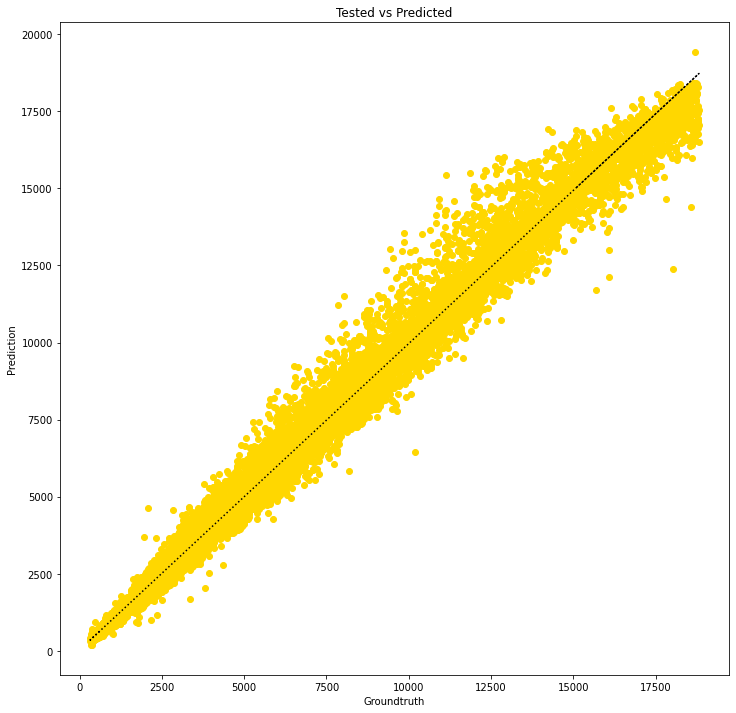

In [169]:
plt.figure(figsize=(12,12))
plt.scatter(x=y["price"],y=y_pred["predict"], c="gold")
plt.plot(y["price"],b+m*(y["price"]),':', c="black")
plt.title("Tested vs Predicted")
plt.xlabel("Groundtruth")
plt.ylabel("Prediction")
plt.savefig("output/auto_ML.jpg")